## Essential libraries

In [ ]:
# make sure you have installed all necessary libraries

In [7]:
pip install shap

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509241 sha256=705d37b7c923f43dda98d5184e1d2becae721e961ce782585df80f5b151668b6
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


##Data Entry

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [9]:
# clone git repo
!git clone https://github.com/linahourieh/Student-Registry-Status

# change directory
%cd Student-Registry-Status/Data

Cloning into 'Student-Registry-Status'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 50 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.
/content/Student-Registry-Status/Data/Student-Registry-Status/Data


In [10]:
# load data into dataframe
df = pd.read_csv('Uni Registry.csv')

In [11]:
#peak on data
df.head(1)

,Student ID,Student Level,Country,Nationality,Faculty Name,Programme,Prog-Track Name,Gender,Directly,Registration Status,Sponsor Status,Payment Status,Disability,GPAF,WF,PRF,SRF,Dominate,Weight,Age,Social Status,High School GPA,First English Level,Current GPA,Financial Support,Degree Seeking Status,Previous Drops,NO of Warnings,Duration Spent in Years,Programme Total CHRs,Completed Programme CHRs
0,1070491.0,Level 4,Kuwait,Kuwait,Business Studies,BA,FBS-BBA-OU-BA-SYS-NA,FEMALE,False,True,False,PARTIALLY,False,0.33333,0.33333,1.0,1.0,PRF,0.000062,41,Other,2.81,EL112,1.85,True,TRUE,7,3,9.5,128,106


In [12]:
#dimensions of dataset
df.shape

(33425, 31)

In [ ]:
#dimensions of dataset
df.shape

(31421, 25)

In [ ]:
#removing unusefull columns
df.drop(columns=['Student ID', 'Nationality', 'Specialization'], inplace=True)

In [ ]:
#removing columns based on EDA
df.drop(columns=['Country','Programme','Age','Social Status','Faculty Name','Gender','Payment Status','Registration Status','Student Level','Disability','Sponsor Status','Directly', 'First English Level','High School GPA'], inplace =True)

In [ ]:
#missing values
df.isnull().sum()

Student Status                       0
Current GPA                          0
Financial Support                    0
Degree Seeking Status                0
Previous Drops                       0
NO of Warnings                       0
Duration Spent in Years              0
Study Plan Achievement Percentage    0
dtype: int64

In [ ]:
#data type
df.dtypes

Student Status                         int64
Current GPA                          float64
Financial Support                       bool
Degree Seeking Status                   bool
Previous Drops                         int64
NO of Warnings                         int64
Duration Spent in Years              float64
Study Plan Achievement Percentage     object
dtype: object

In [ ]:
#cleaning some variables
df['Study Plan Achievement Percentage'] = df['Study Plan Achievement Percentage'].str.rstrip("%").astype(float)

##X & Y splitting

In [ ]:
#dependent variable
y = df['Student Status']

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
31416    1
31417    1
31418    1
31419    1
31420    1
Name: Student Status, Length: 31421, dtype: int64

In [ ]:
#independent variables
X = df.drop(columns='Student Status')

In [ ]:
X

,Current GPA,Financial Support,Degree Seeking Status,Previous Drops,NO of Warnings,Duration Spent in Years,Study Plan Achievement Percentage
0,0.00,True,True,0,1,0.5,2.3
1,0.00,False,True,0,0,0.5,2.3
2,0.00,False,True,0,1,0.5,2.3
3,0.00,True,False,0,2,1.0,2.3
4,0.00,True,True,0,1,0.5,2.3
...,...,...,...,...,...,...,...
31416,2.55,False,False,3,0,5.0,97.7
31417,2.52,True,True,8,0,6.0,97.7
31418,2.33,True,False,0,0,8.5,97.7
31419,2.48,False,False,0,0,7.5,97.7


##Encoding

In [ ]:
#encoding boolean variables
k = X.select_dtypes(include=['bool']).columns
X[k] = X[k].astype(int)

In [ ]:
X

,Current GPA,Financial Support,Degree Seeking Status,Previous Drops,NO of Warnings,Duration Spent in Years,Study Plan Achievement Percentage
0,0.00,1,1,0,1,0.5,2.3
1,0.00,0,1,0,0,0.5,2.3
2,0.00,0,1,0,1,0.5,2.3
3,0.00,1,0,0,2,1.0,2.3
4,0.00,1,1,0,1,0.5,2.3
...,...,...,...,...,...,...,...
31416,2.55,0,0,3,0,5.0,97.7
31417,2.52,1,1,8,0,6.0,97.7
31418,2.33,1,0,0,0,8.5,97.7
31419,2.48,0,0,0,0,7.5,97.7


##Scaling

In [ ]:
#Two types of scaling
X_standard = X.copy()
X_robust = X.copy()

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
num_columns = X.select_dtypes(include=['int', 'float']).columns
num_var = X[num_columns]
ss = StandardScaler().fit(num_var)
X_standard[num_columns] = ss.transform(num_var)

In [ ]:
X_standard.head(3)

,Current GPA,Financial Support,Degree Seeking Status,Previous Drops,NO of Warnings,Duration Spent in Years,Study Plan Achievement Percentage
0,-1.925498,2.169967,0.7588,-0.354963,0.215105,-1.272754,-1.04024
1,-1.925498,-0.460836,0.7588,-0.354963,-0.545251,-1.272754,-1.04024
2,-1.925498,-0.460836,0.7588,-0.354963,0.215105,-1.272754,-1.04024


In [ ]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler
num_columns = X.select_dtypes(include=['int', 'float']).columns
num_var = X[num_columns]
ss = RobustScaler().fit(num_var)
X_robust[num_columns] = ss.transform(num_var)

In [ ]:
X_robust.head(3)

,Current GPA,Financial Support,Degree Seeking Status,Previous Drops,NO of Warnings,Duration Spent in Years,Study Plan Achievement Percentage
0,-1.729508,1.0,0.0,0.0,1.0,-0.6,-0.512953
1,-1.729508,0.0,0.0,0.0,0.0,-0.6,-0.512953
2,-1.729508,0.0,0.0,0.0,1.0,-0.6,-0.512953


##Removing Multicollinearity

In [ ]:
#calcuating VIFs
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_robust[num_columns]
junk = []
x = add_constant(X)
vif0 = pd.Series([variance_inflation_factor(x.values, i)  for i in range(x.shape[1])], index=x.columns)
vif = pd.Series([variance_inflation_factor(x.values, i)  for i in range(x.shape[1])], index=x.columns)

vif

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


const                                2.144965
Current GPA                          1.528513
Financial Support                    1.084515
Degree Seeking Status                1.029597
Previous Drops                       1.114276
NO of Warnings                       1.326924
Duration Spent in Years              2.347705
Study Plan Achievement Percentage    2.630537
dtype: float64

In [ ]:
#calcuating VIFs
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_standard[num_columns]
junk = []
x = add_constant(X)
vif0 = pd.Series([variance_inflation_factor(x.values, i)  for i in range(x.shape[1])], index=x.columns)
vif = pd.Series([variance_inflation_factor(x.values, i)  for i in range(x.shape[1])], index=x.columns)

vif

const                                1.000000
Current GPA                          1.528513
Financial Support                    1.084515
Degree Seeking Status                1.029597
Previous Drops                       1.114276
NO of Warnings                       1.326924
Duration Spent in Years              2.347705
Study Plan Achievement Percentage    2.630537
dtype: float64

In [ ]:
#removing features with high vif
vif= vif.reset_index()
dic={'index': "variable", 0: "vif_value"}
vif= vif.rename(dic, axis=1)

list_1 = []
for i in vif['vif_value']:
  if i < 5:
    list_1.append(vif[vif['vif_value'] == i].iloc[0,0])

list_1.remove('const')

X_robust = X_robust[list_1]
X_standard = X_standard[list_1]

##Test Train Split

In [ ]:
#splitting Dataset
from sklearn.model_selection import train_test_split

X_robust_train, X_robust_test, y_robust_train, y_robust_test = train_test_split(X_robust, y, test_size = 0.2, random_state = 100, stratify = y)
print(X_robust_train.head(5))
print(y_robust_train[0:3])


       Current GPA  ...  Study Plan Achievement Percentage
14704     0.409836  ...                           1.370466
1412     -1.729508  ...                          -0.572539
3431     -0.639344  ...                          -0.450777
2175     -1.729508  ...                          -0.572539
6661     -1.049180  ...                          -0.189119

[5 rows x 7 columns]
14704    1
1412     1
3431     1
Name: Student Status, dtype: int64


In [ ]:
#splitting dataset 
from sklearn.model_selection import train_test_split

X_standard_train, X_standard_test, y_standard_train, y_standard_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 100, stratify = y)
print(X_standard_train.head(5))
print(y_standard_train[0:3])

       Current GPA  ...  Study Plan Achievement Percentage
14704     0.590802  ...                           1.688772
1412     -1.925498  ...                          -1.126577
3431     -0.643246  ...                          -0.950149
2175     -1.925498  ...                          -1.126577
6661     -1.125296  ...                          -0.571015

[5 rows x 7 columns]
14704    1
1412     1
3431     1
Name: Student Status, dtype: int64


##Decision Tree

In [ ]:
#setting the classifier
from sklearn.tree import DecisionTreeClassifier
classifier_Decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
stkf = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

In [ ]:
#importing evalutating metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn import metrics

In [ ]:
#GridSearch
from sklearn.model_selection import GridSearchCV

parameters = [{"criterion": ['gini', 'entropy'], "max_depth" : [2,4,6,8,12]}]

grid_search = GridSearchCV(estimator = classifier_Decision,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = stkf,
                           n_jobs = -1)

grid_search.fit(X_robust_train, y_robust_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_ 

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("\nBest Parameters:", best_parameters)
print("\nBest Model:", best_model)


Best Accuracy: 98.89 %

Best Parameters: {'criterion': 'gini', 'max_depth': 6}

Best Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [ ]:
Decision_Tree_Model  = best_model

In [ ]:
Decision_Tree_Model.fit(X_robust_train, y_robust_train)
y_pred = Decision_Tree_Model.predict(X_robust_test)

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(y_robust_test, y_pred)
print(cm)
ac = accuracy_score(y_robust_test, y_pred)
print("Accuracy Score: {:.2f} %".format(ac*100))
pr = precision_score(y_robust_test, y_pred)
print("Precision Score: {:.2f} %".format(pr*100))
rc = recall_score(y_robust_test, y_pred)
print("Recall Score: {:.2f} %".format(rc*100))
f1 = f1_score(y_robust_test, y_pred)
print("f1 Score: {:.2f} %".format(f1*100))
fpr, tpr, thresholds = metrics.roc_curve(y_robust_test, y_pred)
area = metrics.auc(fpr, tpr)
print("auc: {:.2f}".format(area))

Confusion Matrix
[[ 171   28]
 [  46 6040]]
Accuracy Score: 98.82 %
Precision Score: 99.54 %
Recall Score: 99.24 %
f1 Score: 99.39 %
auc: 0.93


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{"criterion": ['gini', 'entropy'], "max_depth" : [2,4,6,8,12]}]

grid_search = GridSearchCV(estimator = classifier_Decision,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = stkf,
                           n_jobs = -1)

grid_search.fit(X_standard_train, y_standard_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_ 

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("\nBest Parameters:", best_parameters)
print("\nBest Model:", best_model)

Best Accuracy: 98.89 %

Best Parameters: {'criterion': 'gini', 'max_depth': 6}

Best Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [ ]:
Decision_Tree_Model= best_model

In [ ]:
Decision_Tree_Model.fit(X_standard_train, y_standard_train)
y_pred = Decision_Tree_Model.predict(X_standard_test)

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(y_standard_test, y_pred)
print(cm)
ac = accuracy_score(y_standard_test, y_pred)
print("Accuracy Score: {:.2f} %".format(ac*100))
pr = precision_score(y_standard_test, y_pred)
print("Precision Score: {:.2f} %".format(pr*100))
rc = recall_score(y_standard_test, y_pred)
print("Recall Score: {:.2f} %".format(rc*100))
f1 = f1_score(y_standard_test, y_pred)
print("f1 Score: {:.2f} %".format(f1*100))
fpr_tree_s, tpr_tree_s, thresholds = metrics.roc_curve(y_standard_test, y_pred)
area_tree_s = metrics.auc(fpr_tree_s, tpr_tree_s)
print("auc: {:.2f}".format(area_tree_s))

Confusion Matrix
[[ 171   28]
 [  46 6040]]
Accuracy Score: 98.82 %
Precision Score: 99.54 %
Recall Score: 99.24 %
f1 Score: 99.39 %
auc: 0.93


##Shap Analysis

In [ ]:
EXP_model = Decision_Tree_Model
explainer = shap.KernelExplainer(EXP_model.predict, shap.kmeans(X_standard_train, 100))
shap_values = explainer.shap_values(X_standard_test)

  0%|          | 0/6285 [00:00<?, ?it/s]

In [ ]:
columns = X_standard.columns

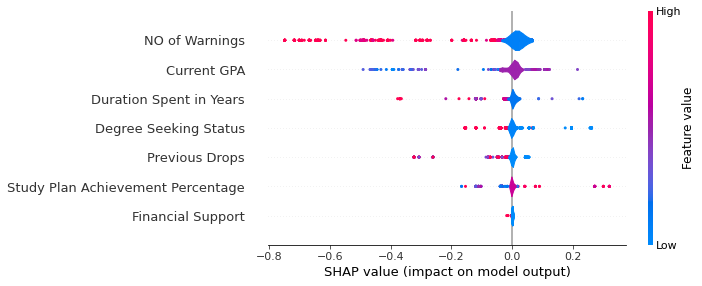

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_standard_test, plot_type = "violin",feature_names= columns) ##plot_type: “dot” (default), “bar”, “violin”

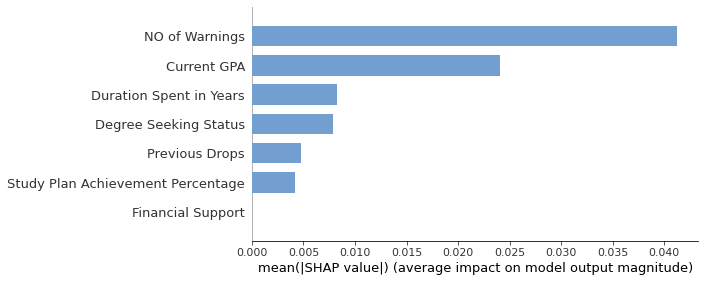

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_standard_test, plot_type = "bar",color='#729fcf',feature_names= columns) ##plot_type: “dot” (default), “bar”, “violin”

In [ ]:
predC = Decision_Tree_Model.predict(X_standard_test)

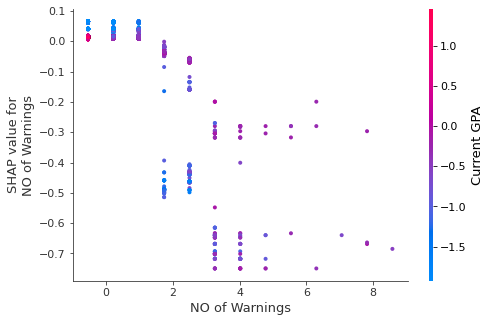

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("NO of Warnings",shap_values, X_standard_test)

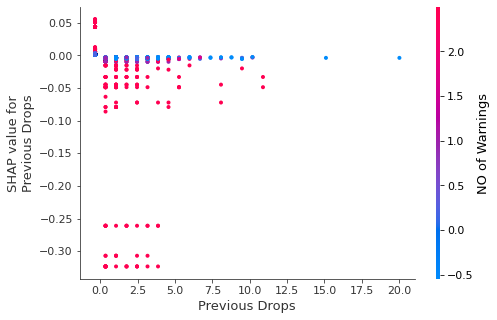

In [ ]:
shap.dependence_plot("Previous Drops", shap_values, X_standard_test)

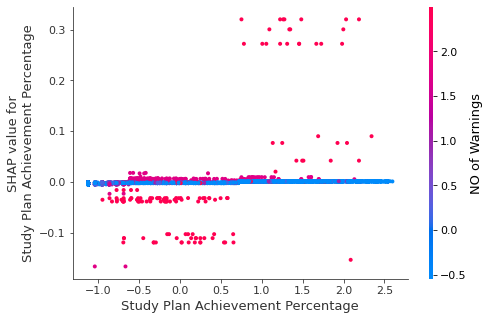

In [ ]:
shap.dependence_plot("Study Plan Achievement Percentage",shap_values, X_standard_test,color='#729fcf')

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state = 0)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}]

grid_search = GridSearchCV(estimator = classifier_logistic,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = stkf,
                           n_jobs = -1)

grid_search.fit(X_robust_train, y_robust_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_ 

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("\nBest Parameters:", best_parameters)
print("\nBest Model:", best_model)

Best Accuracy: 98.35 %

Best Parameters: {'C': 1, 'solver': 'liblinear'}

Best Model: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
LogisticRegression_Model = best_model
LogisticRegression_Model.fit(X_robust_train, y_robust_train)
y_pred = LogisticRegression_Model.predict(X_robust_test)

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(y_robust_test, y_pred)
print(cm)
ac = accuracy_score(y_robust_test, y_pred)
print("Accuracy Score: {:.2f} %".format(ac*100))
pr = precision_score(y_robust_test, y_pred)
print("Precision Score: {:.2f} %".format(pr*100))
rc = recall_score(y_robust_test, y_pred)
print("Recall Score: {:.2f} %".format(rc*100))
f1 = f1_score(y_robust_test, y_pred)
print("f1 Score: {:.2f} %".format(f1*100))
fpr, tpr, thresholds = metrics.roc_curve(y_robust_test, y_pred)
area = metrics.auc(fpr, tpr)
print("auc: {:.2f}".format(area))

Confusion Matrix
[[ 121   78]
 [  29 6057]]
Accuracy Score: 98.30 %
Precision Score: 98.73 %
Recall Score: 99.52 %
f1 Score: 99.12 %
auc: 0.80


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}]

grid_search = GridSearchCV(estimator = classifier_logistic,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = stkf,
                           n_jobs = -1)

grid_search.fit(X_standard_train, y_standard_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_ 

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("\nBest Parameters:", best_parameters)
print("\nBest Model:", best_model)

Best Accuracy: 98.34 %

Best Parameters: {'C': 0.5, 'solver': 'newton-cg'}

Best Model: LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
LogisticRegression_Model = best_model
LogisticRegression_Model.fit(X_standard_train, y_standard_train)
y_pred = LogisticRegression_Model.predict(X_standard_test)

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(y_standard_test, y_pred)
print(cm)
ac = accuracy_score(y_standard_test, y_pred)
print("Accuracy Score: {:.2f} %".format(ac*100))
pr = precision_score(y_standard_test, y_pred)
print("Precision Score: {:.2f} %".format(pr*100))
rc = recall_score(y_standard_test, y_pred)
print("Recall Score: {:.2f} %".format(rc*100))
f1 = f1_score(y_standard_test, y_pred)
print("f1 Score: {:.2f} %".format(f1*100))
fpr, tpr, thresholds = metrics.roc_curve(y_standard_test, y_pred)
area = metrics.auc(fpr, tpr)
print("auc: {:.2f}".format(area))

Confusion Matrix
[[ 122   77]
 [  31 6055]]
Accuracy Score: 98.28 %
Precision Score: 98.74 %
Recall Score: 99.49 %
f1 Score: 99.12 %
auc: 0.80


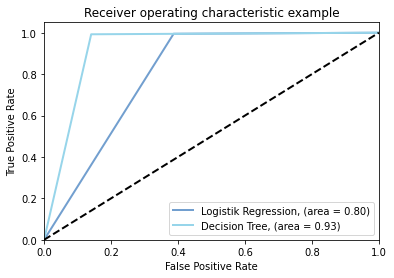

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#729fcf',lw=lw, linestyle='-',label='Logistik Regression, (area = %0.2f)' % area)
plt.plot(fpr_tree_s, tpr_tree_s, color='#97d5ea',lw=lw, linestyle='-',label='Decision Tree, (area = %0.2f)' % area_tree_s)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##Report

Standard Scaling

| Algorithm          | Accuracy| Precision | Recall |F1-score|AUC|
|--------------------|---|---|---|---|---|
| Decision Tree      |98.82|99.54|99.24|99.39|0.93|
| Logistic Regression |98.28|98.74|99.49|99.12|0.80|

Robust Scaling

| Algorithm          | Accuracy| Precision | Recall |F1-score|AUC|
|--------------------|---|---|---|---|---|
| Decision Tree      |98.82|99.54|99.24|99.39|0.93|
| Logistic Regression |98.30|98.73|99.52|99.12|0.80|